### 이미지 로데이터 파일에서 데이터 추출

In [155]:
## [1] 파일 입출력 방식
## with open() as ~

file_path='../data/MNIST/t10k-images.idx3-ubyte'

In [156]:
# 파일 읽을 때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, mode = 'br') as f :
    all_data = f.read()

In [157]:
print(type(all_data), len(all_data))
print(all_data[:100])

<class 'bytes'> 7840016
b"\x00\x00\x08\x03\x00\x00'\x10\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00"


In [158]:
# 파일 읽을 때 고려사항 => mode = br : 바이트 읽기 모드
with open(file_path, mode = 'br') as f :
    magic_code = f.read(4)    # 앞에 4바이트만 읽겠다
    print(magic_code)
    
    data_length = f.read(4)    # 그 다음 4바이트를 읽겠다.
    print(data_length)
    
    row = f.read(4)            # 그 다음 4바이트를 읽겠다.
    print(row)
    
    col = f.read(4)            # 그 다음 4바이트를 읽겠다.
    print(col)

b'\x00\x00\x08\x03'
b"\x00\x00'\x10"
b'\x00\x00\x00\x1c'
b'\x00\x00\x00\x1c'


In [159]:
# 바이트 => 알아보는 문자로
row.hex()       # 바이트가 hex로 바뀌었다. (타입은 문자열이 되었다.)

'0000001c'

In [160]:
hex(10)

'0xa'

- [2] 파이선의 byte 데이터 변환 모듈 strluct 활용 <hr>

In [161]:
# 모듈 로딩
import struct

In [162]:
# 데이터 추출 및 저장 관련 변수
save_file = '../data/MNIST/mnist.csv'     #그냥 파일명만 하면 현재 위치에 저장됨. 경로까지 설정해야 그 위치에 저장됨

In [163]:
# ==> 데이터 추출 및 저장 관련 변수
# 학습용 : train.csv
# 테스트용 : test.csv
# 위치 : ../data/txt/

save_dir = '../data/text/'
data_dir = '../data/MNIST/'

train_file = data_dir + 'train.csv'
test_file = data_dir + 'test.csv'

In [1]:
# 사용자 정의 함수 --------------------------------------------------------
# 기능 : rw data 파일을 읽어서 csv파일로 저장
# 함수명 : to_csv
# 매개변수 : 파일이름, 데이터수
# 반환값 : 파일 생성 여부 True/False
# -----------------------------------------------------------------------
import os, struct

# 디버깅 출력 제어 플래그 변수
DEBUG = False

# CSV 변환 기능 함수
def to_csv(name, maxdata):
    # (1) CSV 저장할 데이터 준비
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open(data_dir + name + '-labels.idx1-ubyte', 'rb')
    img_f = open(data_dir + name + '-images.idx3-ubyte', 'rb')
    # rb => read byte 라고 바이트형식으로 된 파일을 읽는다는 거임
    
    # csv 파일 생성
    csv_f = open(save_dir + name + '.csv', 'w', encoding = 'utf-8')
    
    # 헤더 정보 읽기
    mag, lbl_count = struct.unpack('>II', lbl_f.read(8)) # 매직코드 + 레이블 갯수
    mag, img_count = struct.unpack('>II', img_f.read(8)) # 매직코드 + 이미지 개수
    rows, cols = struct.unpack('>II', img_f.read(8)) # 행, 열 갯수
    pixels = rows * cols

    print('lbl_count {}, img_count {}'.format(lbl_count, img_count))
    print('rows {}, cols {}'.format(rows, cols))
    
    # (2) 이미지 데이터를 읽고 CSV로 저장
    for idx in range(lbl_count):
        if idx > maxdata : break
        
        # 숫자이미지 데이터가 의미하는 숫자값 읽기
        # 튜플 타입 리턴 => 1개 데이터 (value,)
        label = struct.unpack('B', lbl_f.read(1))[0]
        if DEBUG : print('label = >{}'.format(label))
        
        # 이미지 데이터 읽기
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n : str(n), bdata)) # 문자열로 변환
        if DEBUG : print('sdata => {}'.format(sdata))
        
        # csv 파일에 쓰기 => 라벨, 데이터1, 데이터2, 데이터3, ... , 데이터 784
        csv_f.write(str(label) + ',')         # 숫자 라벨 쓰기
        csv_f.write(','.join(sdata) + '\r\n') # 리스트 이미지 데이터 -> 문자열 변환 쓰기
        
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    # 생성된 파일 존재 여부 확인 후 반환
    return os.path.exists(save_dir + f'{name}.csv')

In [165]:
# 학습용 데이터 파일 생성
to_csv('train', 10000)

lbl_count 60000, img_count 60000
rows 28, cols 28


True

In [166]:
# 테스트용 데이터 파일 생성
to_csv('t10k', 1000)

lbl_count 10000, img_count 10000
rows 28, cols 28


True

- [3] 이미지 데이터 로딩 후 시각화 <hr>

- [3-1] 이미지 데이터 로딩 CSV => DataFrame 또는 Numpy

In [167]:
import pandas as pd
import numpy as np

In [168]:
csv_data = np.loadtxt('../data/text/train.csv', delimiter=',')
# csv_data

In [169]:
file = pd.read_csv('../data/text/train.csv', header = None)
file

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
file.iloc[0].shape

(785,)

In [171]:
# 이미지 데이터와 라벨 분리
labels = file[0]
img_data = file.iloc[:,1:]

labels.shape, img_data.shape

((10001,), (10001, 784))

In [172]:
img_data[:3]

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- [3-2] 데이터 시각하

In [173]:
import matplotlib.pyplot as plt

In [174]:
# 1D 이미지 데이터 => 2D 이미지 데이터 변환
raw_img = img_data.iloc[0].values

type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (784,), 1)

In [175]:
raw_img = raw_img.reshape(-1 ,28)
type(raw_img), raw_img.shape, raw_img.ndim

(numpy.ndarray, (28, 28), 2)

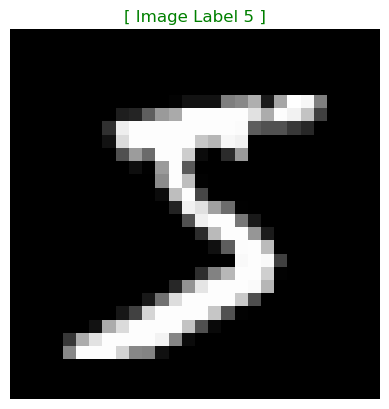

In [176]:
# 시각화
plt.imshow(raw_img, cmap = 'gray')
plt.title(f"[ Image Label {labels[0]} ]", color = 'green')
plt.axis('off')
plt.show()